In [83]:
import nibabel as nib
import numpy as np
mr_img_normal = nib.load('../slice_data_side/IXI528-Guys-1073-T1_side_131.nii')
mr_img_defaced = nib.load('../data/IXI528-Guys-1073-T1_defaced.nii')
mr_img_mask = nib.load('../slice_data_side/IXI528-Guys-1073-T1_side_mask_131.nii')
norm_data = mr_img_normal.get_data()
def_data = mr_img_defaced.get_data()
mask_data = mr_img_mask.get_data()
print(mr_img_normal.shape)
print(mr_img_mask.shape)
print(mr_img_defaced.shape)

(256, 256)
(256, 256)
(256, 256, 150)


In [77]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val)
    return norm_x


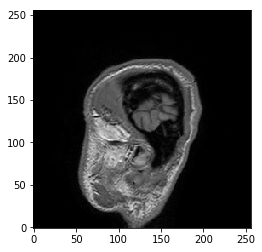

In [59]:
#norm_arr = [#norm_data2[127, :, :],
            #norm_data2[:, 127, :],
            #norm_data2[:, :, 74]]
norm = norm_data
show_slice(norm)

1
0
0.90606689453125


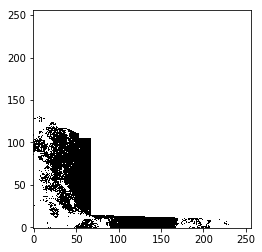

In [60]:
show_slice(mask_data)
print(np.max(mask_data))
print(np.min(mask_data))
print(len(np.where(mask_data == 1)[0])/np.prod(mask_data.shape))

(256, 256, 1)
0.5005336
1.0
0.99989605
0.9999998807907104
16299


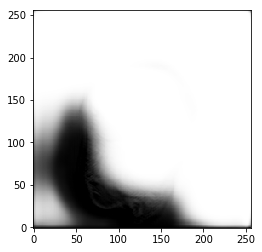

In [78]:
# Predicted Mask 
mr_img_pmask = nib.load('../d_mask.nii')
pmask_data = mr_img_pmask.get_data()
print(pmask_data.shape)
show_slice(normalizeImg(pmask_data[:, :, 0]))
print(np.min(pmask_data))
print(np.max(pmask_data))
print(np.median(pmask_data))
print(np.percentile(pmask_data, 75))
print(len(np.where(pmask_data == 1)[0]))

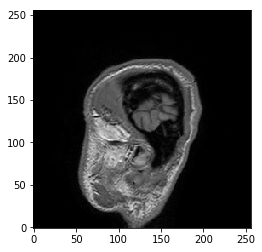

In [68]:
norm = norm_data
show_slice(norm)

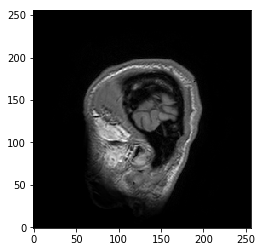

In [82]:
# Produce masked input via predicted mask
pred_applied_mask = np.multiply(normalizeImg(pmask_data[:, :, 0]), norm)


show_slice(pred_applied_mask)

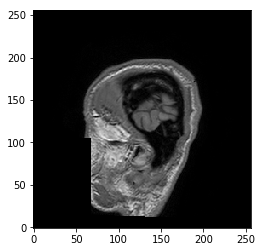

In [67]:
applied_mask = np.multiply(mask_data, norm)
show_slice(applied_mask)


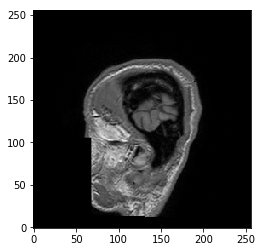

In [84]:
# Defaced
show_slice(def_data[:, :, 131])